### Using Genetic Algorithm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l1_l2

# Load data
df = pd.read_csv('cloud_data.csv')

# Preprocess data
X = df.drop(['cost'], axis=1)
y = df['cost']

# Scale data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
mse = model.evaluate(X_test, y_test)
mae = np.mean(np.abs(y_test.ravel() - model.predict(X_test).ravel()))
mape = np.mean(np.abs((y_test.ravel() - model.predict(X_test).ravel()) / y_test.ravel())) * 100

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# Make predictions
predictions = model.predict(X_test)

# Print optimized instances
optimized_instances = []
for i in range(10):
    cpu = np.random.randint(1, 5)
    memory = np.random.randint(4, 16)
    storage = np.random.randint(8, 32)
    input_data = pd.DataFrame({'cpu': [cpu], 'memory': [memory], 'storage': [storage]})
    input_data = scaler.transform(input_data)
    predicted_cost = model.predict(input_data)[0][0]
    optimized_instances.append((cpu, memory, storage, predicted_cost))

print('Optimized instances:')
for instance in optimized_instances:
    print(f'CPU: {instance[0]}, Memory: {instance[1]} GB, Storage: {instance[2]} GB, Predicted Cost: ${instance[3]:.2f}')

### Using Feed-forward NN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('cloud_data.csv')

X = df.drop(['cost'], axis=1)
y = df['cost']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 1/25
25/25 [==============================] - 1s 10ms/step - loss: 2.5780 - val_loss: 2.2867
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 2.2222 - val_loss: 1.9723
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 1.8741 - val_loss: 1.6529
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 1.5273 - val_loss: 1.3076
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 1.1848 - val_loss: 0.9690
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.8447 - val_loss: 0.6570
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.5778 - val_loss: 0.3993
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.3478 - val_loss: 0.2109
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.2023 - val_loss: 0.1079
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.1222 - val_loss: 0.0722
Epoch 11/25
25/25 

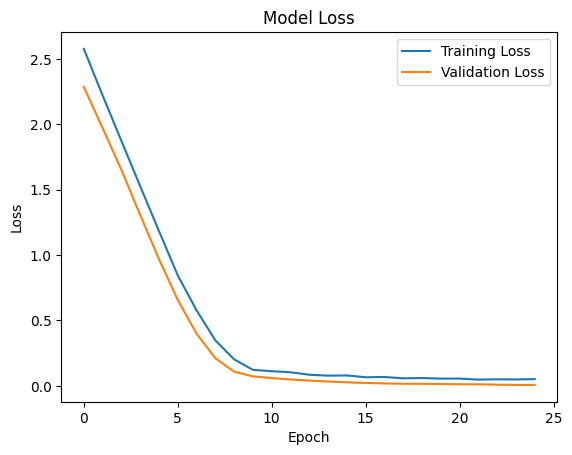

7/7 [==============================] - 0s 2ms/step


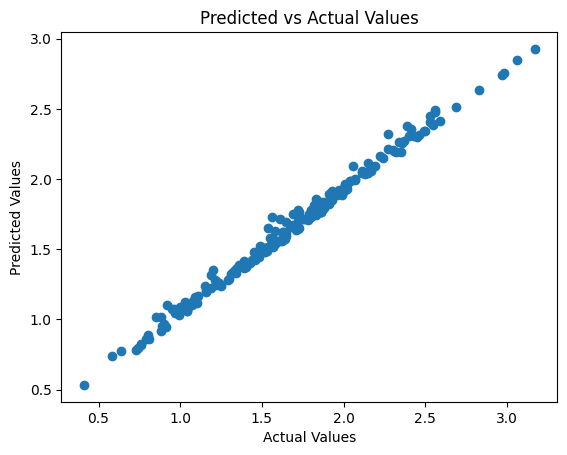

7/7 [==============================] - 0s 3ms/step
MSE: 0.0067
MAE: 0.0655
MAPE: 4.25%
7/7 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 37ms/step
Optimized instances:
CPU: 3, Memory: 15 GB, Storage: 8 GB, Predicted Cost: $0.63
CPU: 2, Memory: 13 GB, Storage: 26 GB, Predicted Cost: $0.71
CPU: 2, Memory: 13 GB, Storage: 18 GB, Predicted Cost: $0.64
CPU: 4, Memory: 10 GB, Storage: 11 GB, Predicted Cost: $0.59
CPU: 3, Memory: 4 GB, Storage: 12 GB, Predicted Cost: $0.48
CPU: 3, Memory: 7 GB, Storage: 28 GB, Predicted Cost: $0.68
CPU: 4, Memory: 10 GB, Storage: 18 GB, Predicted Cost: $0.65
CPU: 1, Memory: 4 GB, Storage: 22 GB, Predicted Cost: $0.51
CPU: 3, Memory: 8 GB, Storage: 13 GB, Predicted Cost: $0.54
CPU: 1, Memory: 8 GB, Storage: 19 GB, Predicted Cost: $0.53


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0001))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

mse = model.evaluate(X_test, y_test)
mae = np.mean(np.abs(y_test.ravel() - model.predict(X_test).ravel()))
mape = np.mean(np.abs((y_test.ravel() - model.predict(X_test).ravel()) / y_test.ravel())) * 100

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

model.save('dnn_model.h5')

predictions = model.predict(X_test)

optimized_instances = []
for i in range(10):
    cpu = np.random.randint(1, 5)
    memory = np.random.randint(4, 16)
    storage = np.random.randint(8, 32)
    input_data = pd.DataFrame({'cpu': [cpu], 'memory': [memory], 'storage': [storage]})
    input_data = scaler.transform(input_data)
    predicted_cost = model.predict(input_data)[0][0]
    optimized_instances.append((cpu, memory, storage, predicted_cost))

print('Optimized instances:')
for instance in optimized_instances:
    print(f'CPU: {instance[0]}, Memory: {instance[1]} GB, Storage: {instance[2]} GB, Predicted Cost: ${instance[3]:.2f}')


### Using LSTM(RNN)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('cloud_data.csv')

X = df.drop(['cost'], axis=1)
y = df['cost']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Epoch 1/25
25/25 [==============================] - 10s 134ms/step - loss: 3.1598 - val_loss: 2.9654
Epoch 2/25
25/25 [==============================] - 1s 22ms/step - loss: 2.9986 - val_loss: 2.8082
Epoch 3/25
25/25 [==============================] - 0s 11ms/step - loss: 2.8266 - val_loss: 2.6277
Epoch 4/25
25/25 [==============================] - 0s 14ms/step - loss: 2.6288 - val_loss: 2.4194
Epoch 5/25
25/25 [==============================] - 0s 15ms/step - loss: 2.3978 - val_loss: 2.1801
Epoch 6/25
25/25 [==============================] - 0s 13ms/step - loss: 2.1416 - val_loss: 1.9166
Epoch 7/25
25/25 [==============================] - 0s 14ms/step - loss: 1.8526 - val_loss: 1.6205
Epoch 8/25
25/25 [==============================] - 0s 12ms/step - loss: 1.5408 - val_loss: 1.3111
Epoch 9/25
25/25 [==============================] - 0s 11ms/step - loss: 1.2270 - val_loss: 0.9987
Epoch 10/25
25/25 [==============================] - 0s 13ms/step - loss: 0.9078 - val_loss: 0.7003
Epoch 1

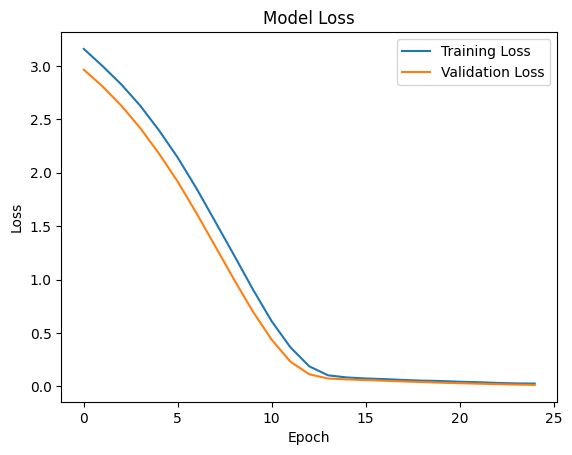

7/7 [==============================] - 2s 4ms/step


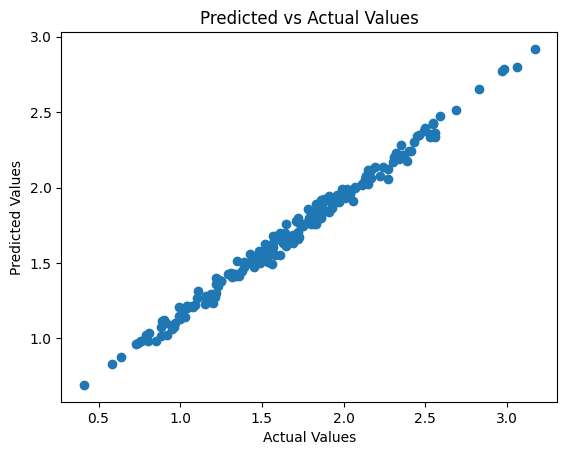

7/7 [==============================] - 0s 5ms/step
MSE: 0.0135
MAE: 0.0957
MAPE: 7.23%
7/7 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 21ms/step
Optimized instances:
CPU: 4, Memory: 7 GB, Storage: 14 GB, Predicted Cost: $0.75
CPU: 3, Memory: 13 GB, Storage: 17 GB, Predicted Cost: $0.84
CPU: 2, Memory: 8 GB, Storage: 30 GB, Predicted Cost: $0.80
CPU: 1, Memory: 11 GB, Storage: 30 GB, Predicted Cost: $0.81
CPU: 4, Memory: 14 GB, Storage: 19 GB, Predicted Cost: $0.91
CPU: 1, Memory: 11 GB, Storage: 11 GB, Predicted Cost: $0.67
CPU: 2, Memory: 11 GB, Storage: 17 GB, Predicted Cost: $0.76
CPU: 4, Memory: 12 GB, Storage: 28 GB, Predicted Cost: $0.94
CPU: 1, Memory: 12 GB, Storage: 28 GB, Predicted Cost: $0.81
CPU: 4, Memory: 15 GB, Storage: 26 GB, Predicted Cost: $0.98


In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X.shape[1])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0001))

early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

mse = model.evaluate(X_test, y_test)
mae = np.mean(np.abs(y_test.ravel() - model.predict(X_test).ravel()))
mape = np.mean(np.abs((y_test.ravel() - model.predict(X_test).ravel()) / y_test.ravel())) * 100

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

model.save('lstm_model.h5')

predictions = model.predict(X_test)

optimized_instances = []
for i in range(10):
    cpu = np.random.randint(1, 5)
    memory = np.random.randint(4, 16)
    storage = np.random.randint(8, 32)
    input_data = pd.DataFrame({'cpu': [cpu], 'memory': [memory], 'storage': [storage]})
    input_data = scaler.transform(input_data)
    input_data = input_data.reshape((1, 1, input_data.shape[1]))
    predicted_cost = model.predict(input_data)[0][0]
    optimized_instances.append((cpu, memory, storage, predicted_cost))

print('Optimized instances:')
for instance in optimized_instances:
    print(f'CPU: {instance[0]}, Memory: {instance[1]} GB, Storage: {instance[2]} GB, Predicted Cost: ${instance[3]:.2f}')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout, Bidirectional, Reshape, Concatenate, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('cloud_data.csv')

X = df.drop(['cost'], axis=1)
y = df['cost']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 1/25
25/25 [==============================] - 11s 85ms/step - loss: 3.2721 - val_loss: 2.9970
Epoch 2/25
25/25 [==============================] - 0s 15ms/step - loss: 3.0052 - val_loss: 2.7493
Epoch 3/25
25/25 [==============================] - 0s 13ms/step - loss: 2.7468 - val_loss: 2.5024
Epoch 4/25
25/25 [==============================] - 0s 15ms/step - loss: 2.4959 - val_loss: 2.2454
Epoch 5/25
25/25 [==============================] - 0s 14ms/step - loss: 2.1999 - val_loss: 1.9686
Epoch 6/25
25/25 [==============================] - 0s 15ms/step - loss: 1.8978 - val_loss: 1.6654
Epoch 7/25
25/25 [==============================] - 0s 17ms/step - loss: 1.5787 - val_loss: 1.3447
Epoch 8/25
25/25 [==============================] - 0s 13ms/step - loss: 1.2522 - val_loss: 1.0269
Epoch 9/25
25/25 [==============================] - 0s 12ms/step - loss: 0.9299 - val_loss: 0.7198
Epoch 10/25
25/25 [==============================] - 0s 11ms/step - loss: 0.6244 - val_loss: 0.4543
Epoch 11

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


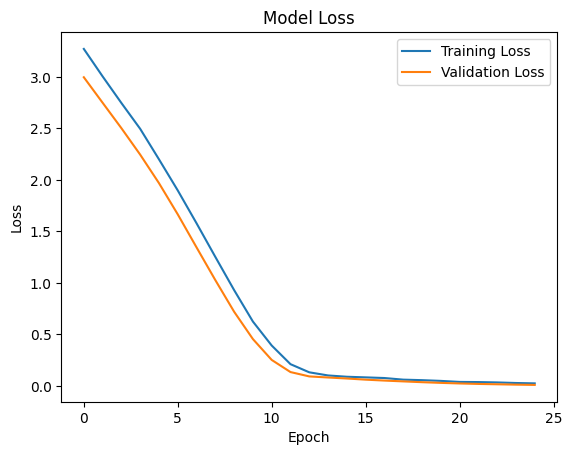

7/7 [==============================] - 1s 4ms/step
MSE: 0.0091
MAE: 0.0749
MAPE: 5.88%


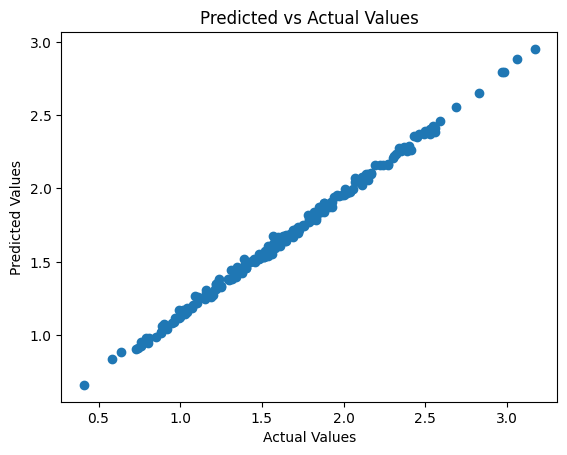

In [ ]:

# Define the DNN model
dnn_input = Input(shape=(X_train.shape[1],))
dnn_output = Dense(64, activation='relu')(dnn_input)
dnn_output = Dropout(0.2)(dnn_output)
dnn_output = Dense(32, activation='relu')(dnn_output)
dnn_output = Dropout(0.2)(dnn_output)

# Define the LSTM model
lstm_input = Input(shape=(1, X_train.shape[1]))
lstm_output = Bidirectional(LSTM(128, return_sequences=True))(lstm_input)
lstm_output = Dropout(0.2)(lstm_output)
lstm_output = Bidirectional(LSTM(64))(lstm_output)
lstm_output = Dropout(0.2)(lstm_output)

# Flatten the LSTM output
lstm_output_flattened = Flatten()(lstm_output)

# Ensure both outputs have the same shape along the concatenation axis
dnn_output_reshaped = Reshape((32,))(dnn_output)

# Combine DNN and LSTM outputs
combined = Concatenate()([dnn_output_reshaped, lstm_output_flattened])

# Final dense layers
final_output = Dense(16, activation='relu')(combined)
final_output = Dense(1)(final_output)

# Create the final model
model = Model(inputs=[dnn_input, lstm_input], outputs=final_output)

# Compile the model
model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0001))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

# Prepare the LSTM input data
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Train the model
history = model.fit([X_train, X_train_lstm], y_train, epochs=25, batch_size=32, validation_data=([X_test, X_test_lstm], y_test),
                    callbacks=[early_stopping])

# Save the model
model.save('combined_dnn_lstm_model.h5')

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Evaluate model
mse = model.evaluate([X_test, X_test_lstm], y_test)
y_pred = model.predict([X_test, X_test_lstm])
mae = np.mean(np.abs(y_test - y_pred.ravel()))
mape = np.mean(np.abs((y_test - y_pred.ravel()) / y_test)) * 100

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# Plot the predicted values vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

Epoch 1/25
25/25 [==============================] - 7s 63ms/step - loss: 3.1914 - val_loss: 3.0410
Epoch 2/25
25/25 [==============================] - 0s 11ms/step - loss: 3.0961 - val_loss: 2.9392
Epoch 3/25
25/25 [==============================] - 0s 10ms/step - loss: 2.9704 - val_loss: 2.7958
Epoch 4/25
25/25 [==============================] - 0s 10ms/step - loss: 2.7956 - val_loss: 2.5957
Epoch 5/25
25/25 [==============================] - 0s 10ms/step - loss: 2.5506 - val_loss: 2.3280
Epoch 6/25
25/25 [==============================] - 0s 11ms/step - loss: 2.2356 - val_loss: 1.9857
Epoch 7/25
25/25 [==============================] - 0s 10ms/step - loss: 1.8532 - val_loss: 1.5716
Epoch 8/25
25/25 [==============================] - 0s 11ms/step - loss: 1.3986 - val_loss: 1.1069
Epoch 9/25
25/25 [==============================] - 0s 14ms/step - loss: 0.9348 - val_loss: 0.6429
Epoch 10/25
25/25 [==============================] - 0s 16ms/step - loss: 0.5269 - val_loss: 0.2912
Epoch 11/

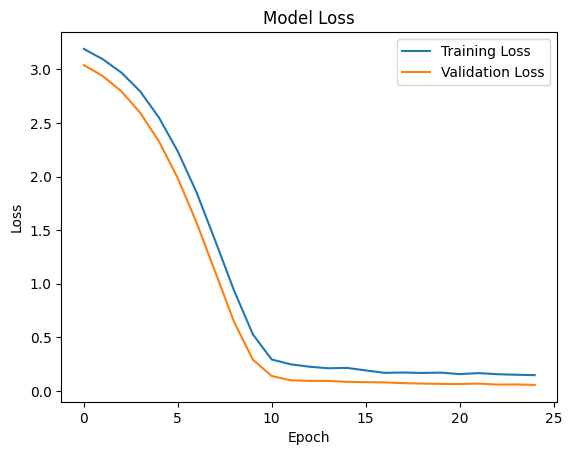

7/7 [==============================] - 1s 4ms/step


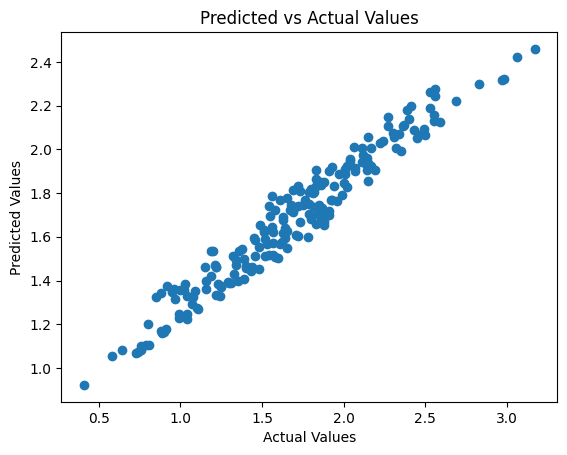

7/7 [==============================] - 0s 3ms/step
MSE: 0.0557
MAE: 0.1878
MAPE: 13.49%
1/1 [==============================] - 0s 18ms/step
Optimized instances:
CPU: 4, Memory: 12 GB, Storage: 16 GB, Predicted Cost: $1.01
CPU: 3, Memory: 6 GB, Storage: 8 GB, Predicted Cost: $0.88
CPU: 2, Memory: 4 GB, Storage: 26 GB, Predicted Cost: $1.02
CPU: 2, Memory: 8 GB, Storage: 18 GB, Predicted Cost: $0.94
CPU: 3, Memory: 6 GB, Storage: 25 GB, Predicted Cost: $1.02
CPU: 3, Memory: 5 GB, Storage: 10 GB, Predicted Cost: $0.89
CPU: 4, Memory: 7 GB, Storage: 21 GB, Predicted Cost: $1.00
CPU: 2, Memory: 11 GB, Storage: 25 GB, Predicted Cost: $1.02
CPU: 3, Memory: 6 GB, Storage: 21 GB, Predicted Cost: $0.98
CPU: 1, Memory: 5 GB, Storage: 16 GB, Predicted Cost: $0.91


In [ ]:
# Define DNN part
input_dnn = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(input_dnn)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)

# Reshape for LSTM input
x = Reshape((1, 16))(x)

# Define LSTM part
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.2)(x)

# Output layer
output = Dense(1)(x)

# Combine DNN and LSTM into one model
model = Model(inputs=input_dnn, outputs=output)

model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0001))

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)

history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the predicted values vs actual values
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Evaluate model
mse = model.evaluate(X_test, y_test)
mae = np.mean(np.abs(y_test.ravel() - model.predict(X_test).ravel()))
mape = np.mean(np.abs((y_test.ravel() - model.predict(X_test).ravel()) / y_test.ravel())) * 100

print(f'MSE: {mse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# Save the model
model.save('combined_dnn_lstm_model.h5')

# Make predictions
predictions = model.predict(X_test)

# Print optimized instances
optimized_instances = []
for i in range(10):
    cpu = np.random.randint(1, 5)
    memory = np.random.randint(4, 16)
    storage = np.random.randint(8, 32)
    input_data = pd.DataFrame({'cpu': [cpu], 'memory': [memory], 'storage': [storage]})
    input_data = scaler.transform(input_data)
    predicted_cost = model.predict(input_data)[0][0]
    optimized_instances.append((cpu, memory, storage, predicted_cost))

print('Optimized instances:')
for instance in optimized_instances:
    print(f'CPU: {instance[0]}, Memory: {instance[1]} GB, Storage: {instance[2]} GB, Predicted Cost: ${instance[3]:.2f}')

MSE: 0.0067
MAE: 0.0655
MAPE: 4.25%